# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [1]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [2]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [3]:
# Getting the shape of the data
movies.shape

(16638, 9)

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [10]:
# Converting the column into datetime
movies['in_theaters_date'] = pd.to_datetime(movies['in_theaters_date'],format='%Y-%m-%d')

In [11]:
# Checking the datatype
movies['in_theaters_date'].value_counts()

2002-01-01    28
2003-01-01    25
2000-01-01    25
2001-01-01    24
1988-01-01    23
              ..
1938-09-29     1
1933-11-17     1
2015-06-13     1
2007-04-23     1
1964-06-17     1
Name: in_theaters_date, Length: 5586, dtype: int64

In [13]:
mask = (movies['in_theaters_date'].dt.year >= 2010)
filtered_movies = movies.loc[mask]
filtered_movies

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0
130,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",2010-08-06,110.0,9,11,33.0,14548.0
155,Priest,PG-13,"Action & Adventure, Horror, Mystery & Suspense...",2011-05-13,83.0,15,99,46.0,86566.0
...,...,...,...,...,...,...,...,...,...
16623,Zombeavers,R,"Action & Adventure, Comedy, Horror",2015-03-20,85.0,69,35,31.0,3629.0
16628,Zoo,PG,"Action & Adventure, Kids & Family",2018-06-08,96.0,88,17,62.0,120.0
16629,Zookeeper,PG,"Comedy, Romance",2011-07-08,101.0,14,131,41.0,44664.0
16631,Zoolander 2,PG-13,Comedy,2016-02-12,102.0,23,226,20.0,41699.0


Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [64]:
# Getting the highest rated movie by tomatometer_ring - ANS
filtered_movies.sort_values('tomatometer_rating',ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3093,"Batman: The Dark Knight Returns, Part 1",PG-13,"Action & Adventure, Animation",2012-01-01,134.0,100,5,93.0,8482.0
8500,King Georges,NR,Documentary,2016-02-26,78.0,100,9,54.0,240.0
8495,King Charles III,NR,Drama,2017-05-14,88.0,100,9,48.0,65.0
8477,Killing for Love (Das Versprechen),NR,"Art House & International, Documentary",2017-12-15,124.0,100,9,82.0,201.0
8461,Kill Zone 2 (Saat po long 2),NR,"Action & Adventure, Art House & International,...",2016-05-13,120.0,100,22,63.0,544.0


In [65]:
# Getting the highest rated movie by audience_rating - ANS
filtered_movies.sort_values('audience_rating',ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
9051,Little Monsters,R,"Comedy, Horror",2019-10-08,94.0,83,94,100.0,9.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0
16438,Wonders of the Sea,NR,Documentary,2019-01-17,82.0,76,17,100.0,13.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0


In [22]:
# Getting the top rated movies by tomatometer
filtered_movies.groupby('movie_title')['tomatometer_rating'].max().sort_values(ascending=False).head(10)

movie_title
The Head Hunter                     100
Lost Angels: Skid Row Is My Home    100
Cold November                       100
The Black Godfather                 100
The Bleeding Edge                   100
Toy Story That Time Forgot          100
Maktub                              100
Lust Stories                        100
Lunch                               100
The C Word                          100
Name: tomatometer_rating, dtype: int64

In [24]:
# Worst rated movie by the tomatometer
filtered_movies.groupby('movie_title')['tomatometer_rating'].max().sort_values(ascending=False).tail(10)

movie_title
Saving Zoë                       0
Is That a Gun in Your Pocket?    0
Black Water                      0
See You in Valhalla              0
Sex Doll                         0
Shank                            0
InAPPropriate Comedy             0
Showdown in Manila               0
Slumber                          0
Brother's Justice                0
Name: tomatometer_rating, dtype: int64

In [23]:
# Getting the top rated movies by audience
filtered_movies.groupby('movie_title')['audience_rating'].max().sort_values(ascending=False).head(10)

movie_title
Charm City                 100.0
The Most Dangerous Year    100.0
Wonders of the Sea         100.0
Sin Alas                   100.0
Left on Purpose            100.0
The Uncondemned            100.0
The Miners' Hymns          100.0
Little Monsters            100.0
Haunt                      100.0
Calling All Earthlings     100.0
Name: audience_rating, dtype: float64

In [28]:
# Worst rated movie by the audience - so many null values
filtered_movies.groupby('movie_title')['audience_rating'].max().sort_values(ascending=False).tail(10)

movie_title
The Sound of Silence                   NaN
Verotika                               NaN
Warriors of the Rainbow: Seediq Bale   NaN
We the Parents                         NaN
Wild Honey Pie!                        NaN
Will You Still Love Me Tomorrow?       NaN
Wounds                                 NaN
Wrinkles the Clown                     NaN
Yosemite                               NaN
You Don't Need Feet to Dance           NaN
Name: audience_rating, dtype: float64

These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [75]:
# Movies that have  100k+ audience ratings
popular_movies = movies.loc[movies['audience_count'] > 100000].reset_index()
popular_movies

,index,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,0
1,3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,0,0,0
2,5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008-03-07,109.0,8,148,37.0,411087.0,0,1,0
3,25,Tristan & Isolde,PG-13,"Drama, Science Fiction & Fantasy, Romance",2006-01-13,99.0,31,121,71.0,220945.0,0,0,0
4,28,Running Scared,R,"Action & Adventure, Drama, Mystery & Suspense",2006-02-24,119.0,41,130,79.0,135373.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0,0,0,0
1930,16622,Zodiac,R,Mystery & Suspense,2007-03-02,157.0,89,248,77.0,493811.0,0,0,0
1931,16626,Zombieland,R,"Comedy, Horror",2009-10-02,88.0,90,249,86.0,642759.0,0,0,0
1932,16630,Zoolander,PG-13,"Comedy, Special Interest",2001-09-28,105.0,64,137,80.0,944701.0,0,0,0


Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [76]:
# Popular rated movies by the tomatometer
popular_movies.sort_values('tomatometer_rating',ascending=False).head(10)

,index,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
1358,11193,Pinocchio,G,"Animation, Kids & Family, Musical & Performing...",1940-02-07,88.0,100,51,73.0,279248.0,1,0,0
550,4389,Citizen Kane,PG,"Classics, Drama, Mystery & Suspense",1941-05-01,119.0,100,84,90.0,158857.0,0,0,0
1794,15415,Toy Story 2,G,"Animation, Comedy, Kids & Family",1999-11-24,92.0,100,169,86.0,999952.0,1,0,0
1547,12588,Singin' in the Rain,G,"Classics, Comedy, Musical & Performing Arts, R...",1952-01-01,102.0,100,56,95.0,138453.0,0,0,0
1177,9587,Mary Poppins,G,"Classics, Comedy, Kids & Family, Musical & Per...",1964-08-26,139.0,100,50,86.0,682310.0,0,0,0
1793,15414,Toy Story,G,"Animation, Comedy, Kids & Family",1995-11-22,80.0,100,88,92.0,1109209.0,1,0,0
1,3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,0,0,0
60,672,Rear Window,PG,"Classics, Drama, Mystery & Suspense",1954-09-01,115.0,100,66,95.0,150539.0,0,0,0
1669,13527,The Terminator,R,"Action & Adventure, Science Fiction & Fantasy",1984-10-26,108.0,100,61,89.0,775856.0,0,1,0
7,50,Aliens,R,"Action & Adventure, Horror, Science Fiction & ...",1986-07-18,138.0,99,72,94.0,429158.0,0,1,0


In [77]:
# Popular rated movies by the audience
popular_movies.sort_values('audience_rating',ascending=False).head(10)

,index,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
1525,12435,The Shawshank Redemption,R,Drama,1994-09-10,142.0,90,71,98.0,885508.0,0,0,0
850,6703,The Godfather,R,Drama,1972-03-24,175.0,98,91,98.0,732931.0,0,0,0
552,4406,Cidade de Deus (City of God),R,"Action & Adventure, Art House & International,...",2003-01-17,130.0,91,159,97.0,251959.0,0,1,0
1496,12204,Schindler's List,R,Drama,1993-12-15,196.0,97,95,97.0,411166.0,0,0,0
1,3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,0,0,0
75,834,GoodFellas,R,Drama,1990-09-19,146.0,96,95,97.0,428871.0,0,0,0
715,5675,Star Wars: Episode V - The Empire Strikes Back,PG,"Action & Adventure, Drama, Science Fiction & F...",1980-06-20,124.0,95,98,97.0,1055106.0,0,1,0
1707,14179,"The Good, the Bad and the Ugly",R,Western,1966-12-23,161.0,97,68,97.0,239453.0,0,0,0
851,6704,"The Godfather, Part II",R,"Drama, Mystery & Suspense",1974-12-20,200.0,97,74,97.0,410868.0,0,0,0
1601,13014,Star Wars: Episode IV - A New Hope,PG,"Action & Adventure, Drama, Science Fiction & F...",1977-05-25,125.0,93,120,96.0,860733.0,0,1,0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [69]:
# Movies that have a PG rating and PG-13 rating
popular_movies.rating.value_counts()

PG-13    783
R        688
PG       358
G         95
NR        10
Name: rating, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [79]:
popular_movies.groupby('rating')['audience_rating'].mean()

rating
G        71.505263
NR       74.200000
PG       63.818436
PG-13    62.367816
R        69.361919
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [70]:
# Importing the numpy library
import numpy as np

In [71]:
popular_movies['Animation'] = np.where(popular_movies.genre.str.contains('Animation'),1,0)
popular_movies

,index,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,0
1,3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,0,0,0
2,5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008-03-07,109.0,8,148,37.0,411087.0,0,1,0
3,25,Tristan & Isolde,PG-13,"Drama, Science Fiction & Fantasy, Romance",2006-01-13,99.0,31,121,71.0,220945.0,0,0,0
4,28,Running Scared,R,"Action & Adventure, Drama, Mystery & Suspense",2006-02-24,119.0,41,130,79.0,135373.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0,0,0,0
1930,16622,Zodiac,R,Mystery & Suspense,2007-03-02,157.0,89,248,77.0,493811.0,0,0,0
1931,16626,Zombieland,R,"Comedy, Horror",2009-10-02,88.0,90,249,86.0,642759.0,0,0,0
1932,16630,Zoolander,PG-13,"Comedy, Special Interest",2001-09-28,105.0,64,137,80.0,944701.0,0,0,0


In [73]:
popular_movies['Action & Adventure'] = np.where(popular_movies.genre.str.contains('Action'),1,0)
popular_movies

,index,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,0
1,3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,0,0,0
2,5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008-03-07,109.0,8,148,37.0,411087.0,0,1,0
3,25,Tristan & Isolde,PG-13,"Drama, Science Fiction & Fantasy, Romance",2006-01-13,99.0,31,121,71.0,220945.0,0,0,0
4,28,Running Scared,R,"Action & Adventure, Drama, Mystery & Suspense",2006-02-24,119.0,41,130,79.0,135373.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0,0,0,0
1930,16622,Zodiac,R,Mystery & Suspense,2007-03-02,157.0,89,248,77.0,493811.0,0,0,0
1931,16626,Zombieland,R,"Comedy, Horror",2009-10-02,88.0,90,249,86.0,642759.0,0,0,0
1932,16630,Zoolander,PG-13,"Comedy, Special Interest",2001-09-28,105.0,64,137,80.0,944701.0,0,0,0


In [74]:
popular_movies['Comedy'] = np.where(popular_movies.genre.str.contains('Comedy'),1,0)
popular_movies

,index,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1
1,3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,0,0,0
2,5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008-03-07,109.0,8,148,37.0,411087.0,0,1,0
3,25,Tristan & Isolde,PG-13,"Drama, Science Fiction & Fantasy, Romance",2006-01-13,99.0,31,121,71.0,220945.0,0,0,0
4,28,Running Scared,R,"Action & Adventure, Drama, Mystery & Suspense",2006-02-24,119.0,41,130,79.0,135373.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0,0,0,0
1930,16622,Zodiac,R,Mystery & Suspense,2007-03-02,157.0,89,248,77.0,493811.0,0,0,0
1931,16626,Zombieland,R,"Comedy, Horror",2009-10-02,88.0,90,249,86.0,642759.0,0,0,1
1932,16630,Zoolander,PG-13,"Comedy, Special Interest",2001-09-28,105.0,64,137,80.0,944701.0,0,0,1


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [81]:
popular_movies.groupby('rating')[['Animation','Action & Adventure','Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,62,29,0
NR,2,1,0
PG,76,148,0
PG-13,9,343,0
R,3,229,0


Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [83]:
popular_movies.groupby('Animation')[['tomatometer_rating','audience_rating']].mean()

,tomatometer_rating,audience_rating
Animation,,
0,55.662738,65.240741
1,70.348684,70.250000


In [84]:
popular_movies.groupby('Action & Adventure')[['tomatometer_rating','audience_rating']].mean()

,tomatometer_rating,audience_rating
Action & Adventure,,
0,56.992399,66.657095
1,56.540000,64.020000


In [85]:
popular_movies.groupby('Comedy')[['tomatometer_rating','audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,56.81696,65.634436


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

In [86]:
import seaborn as sns

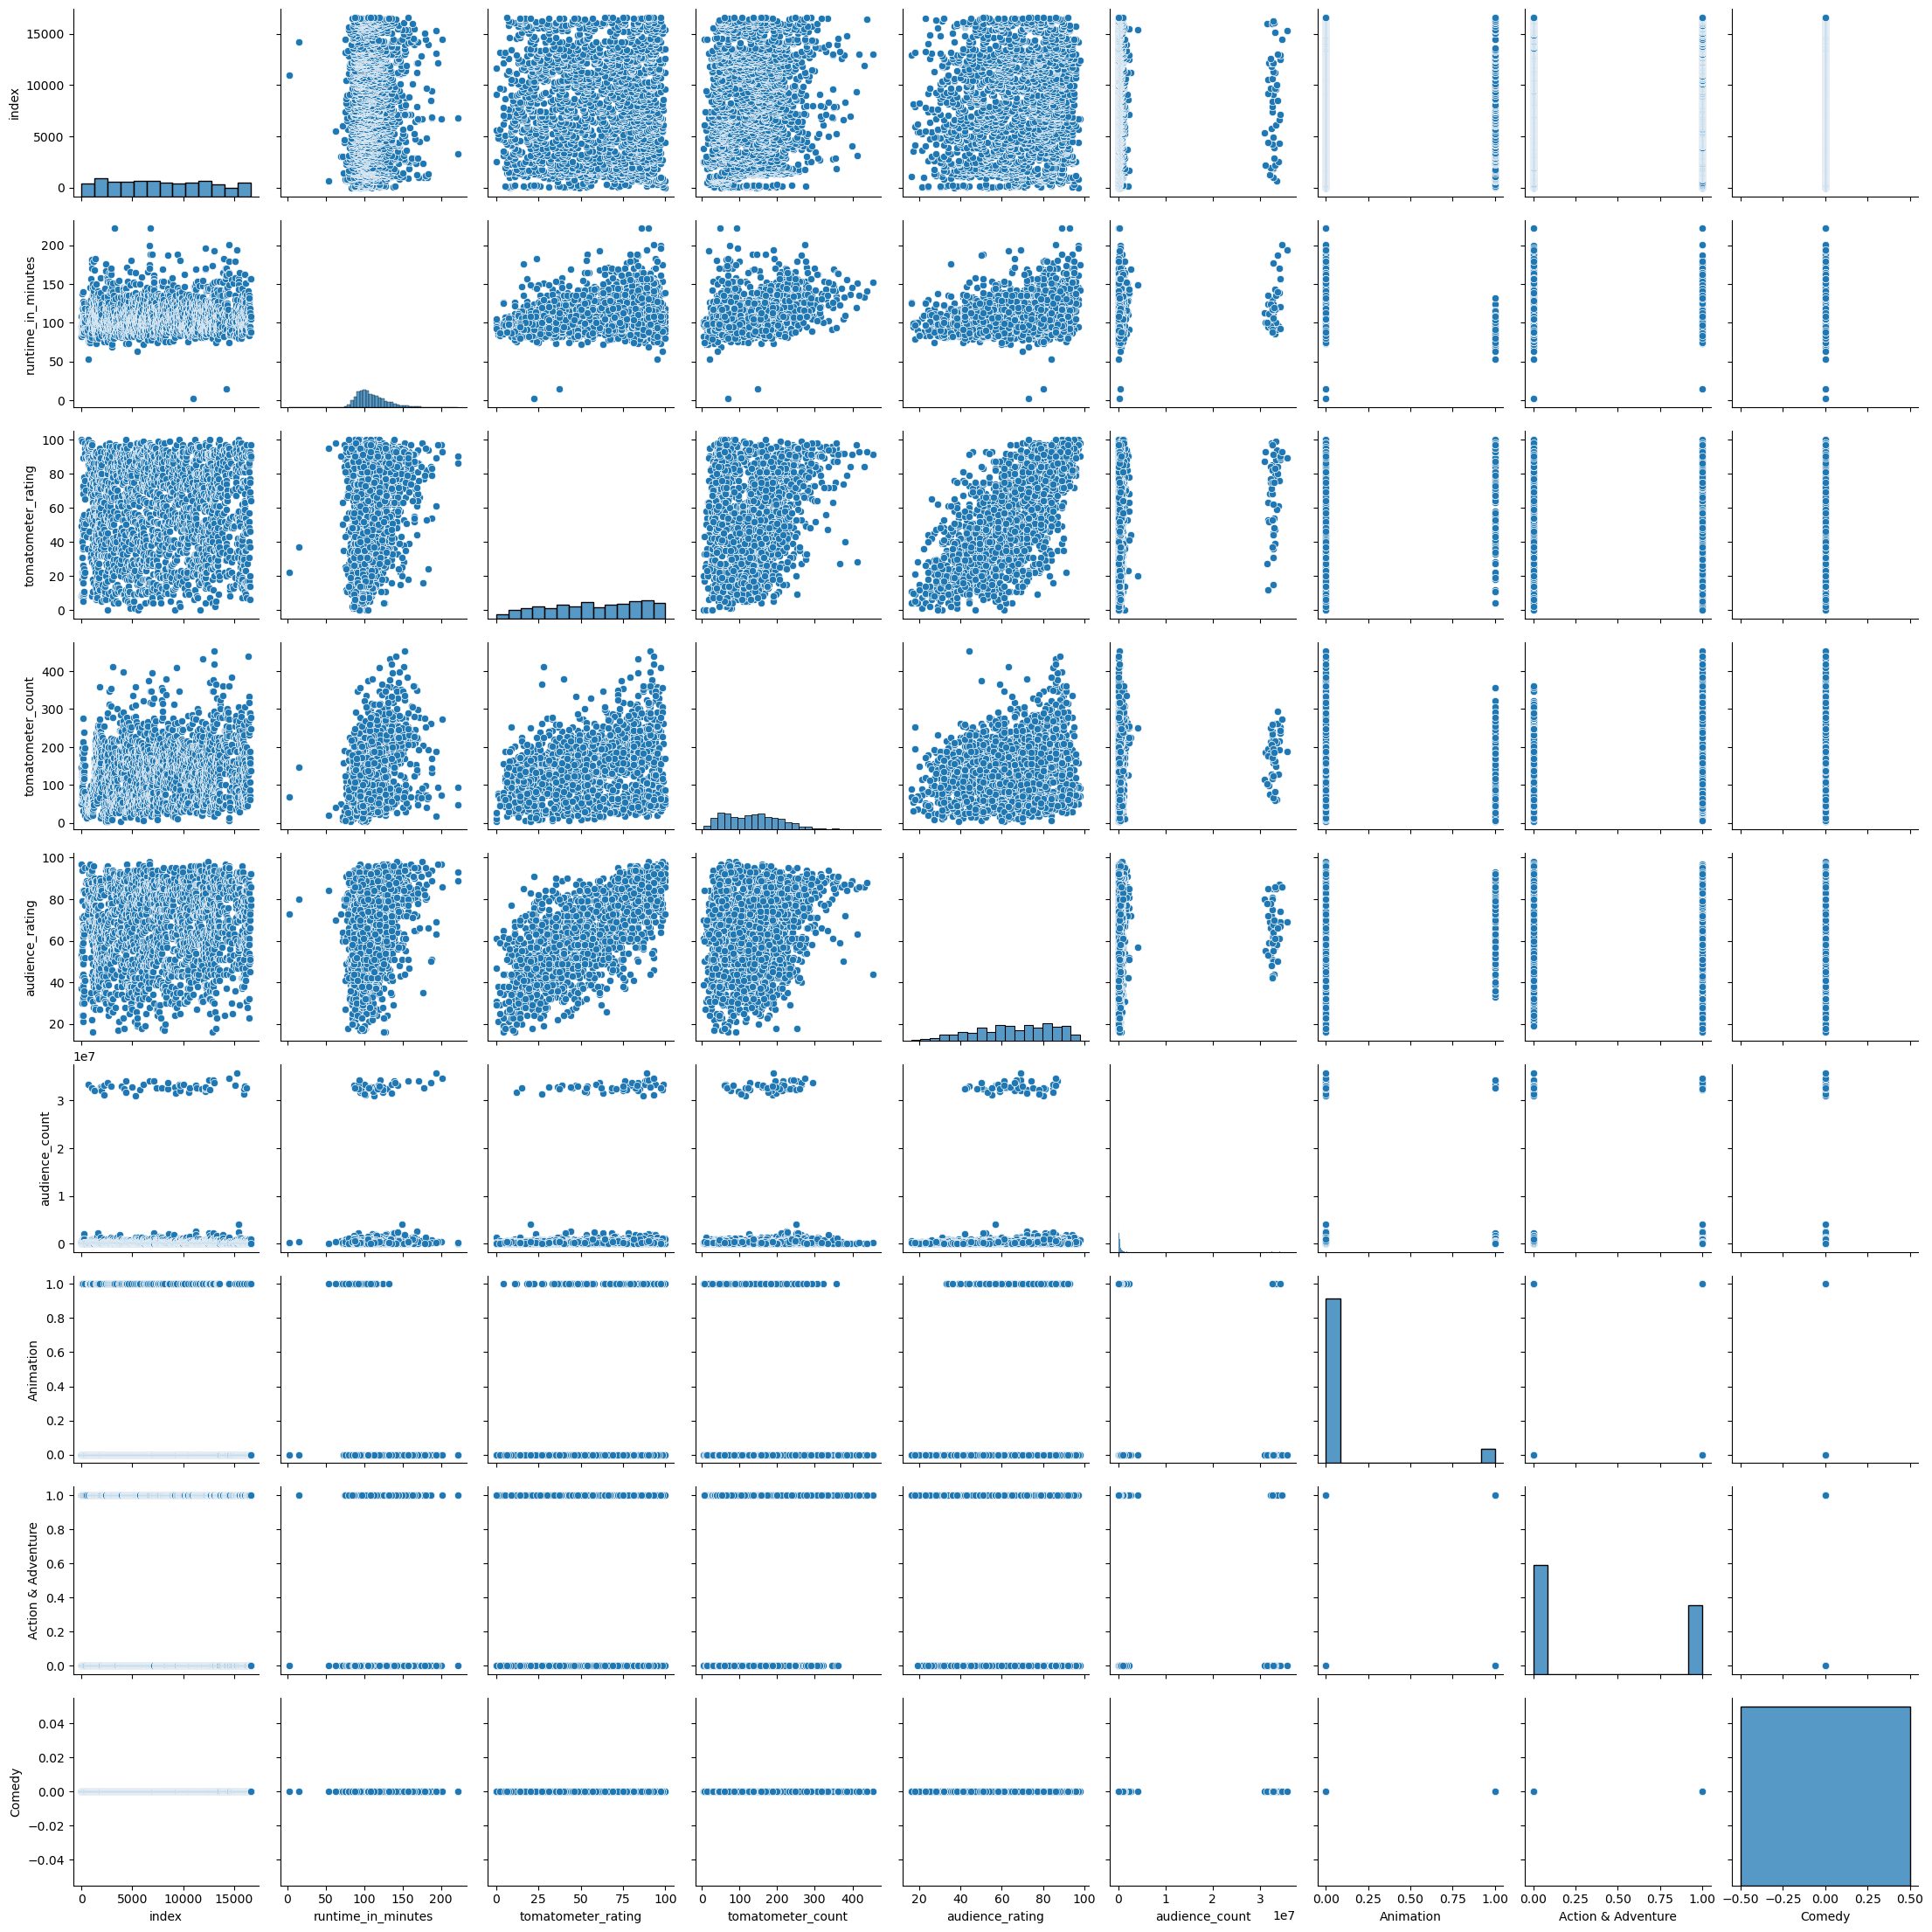

In [87]:
sns.pairplot(popular_movies)

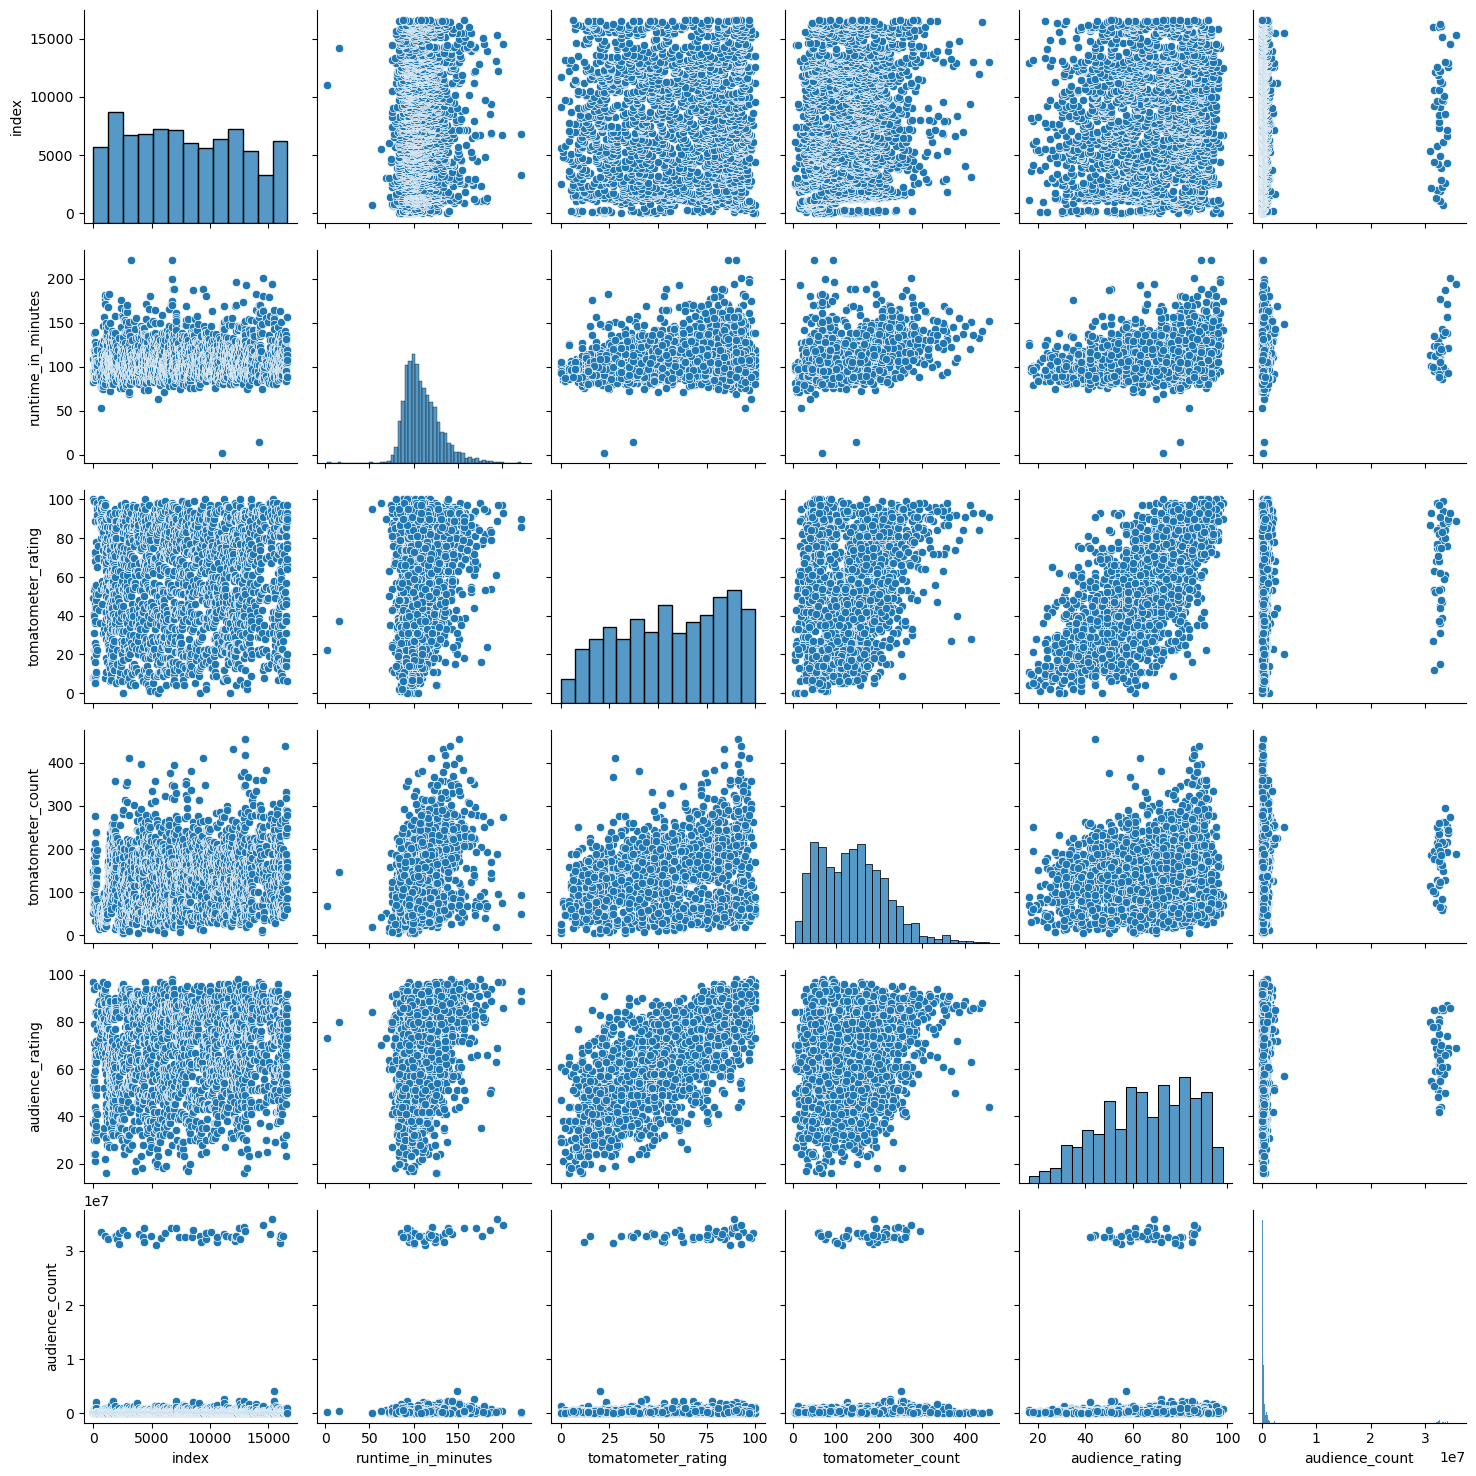

In [89]:
sns.pairplot(popular_movies.iloc[:,:-3])

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?